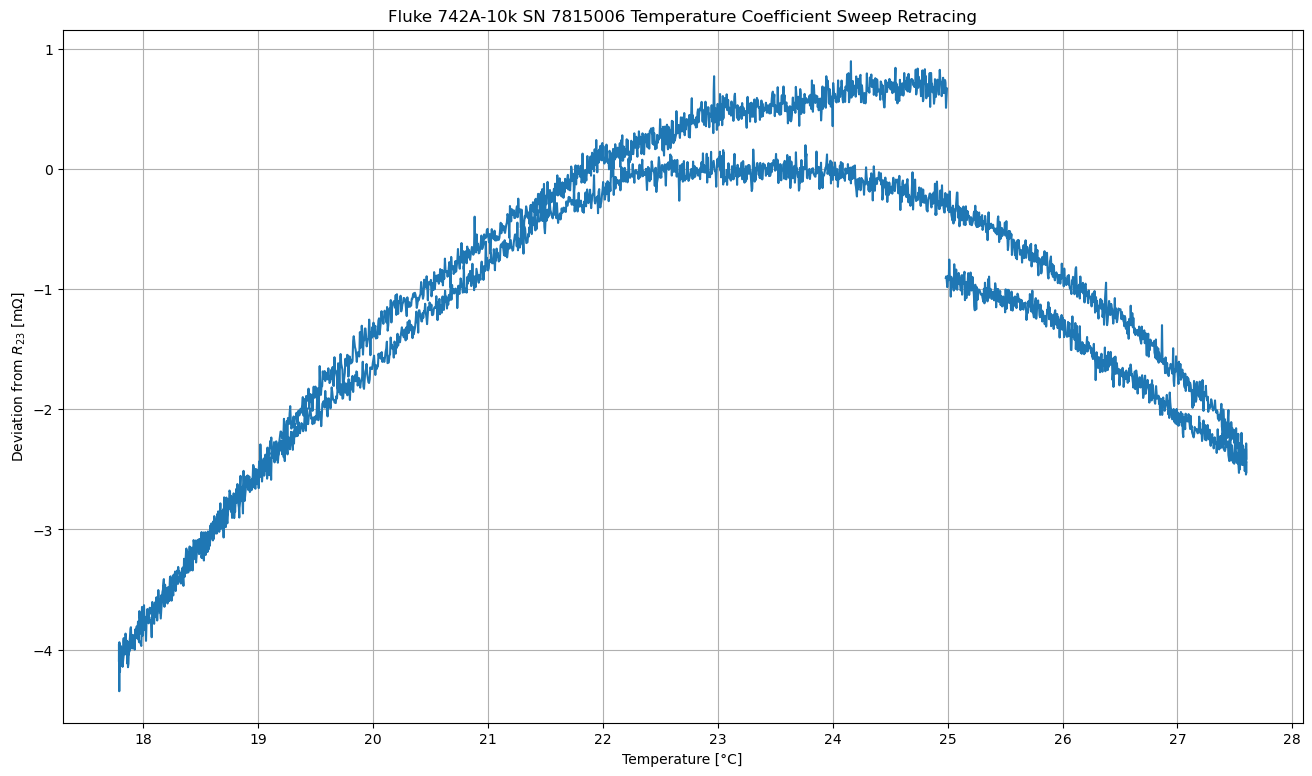

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('https://raw.githubusercontent.com/marcoreps/resistors/refs/heads/main/csv/742a_10k_TCR_sweep_18_23.csv', names=['time', 'DUT_temperature', 'resistance'], skiprows=1)

df=df.interpolate()


temperature=df[400:-50].DUT_temperature

resistance=(df[400:-50].resistance-10000.15965)*1000



fig,ax = plt.subplots(figsize=(16,9))
plt.xlabel('Temperature [¬∞C]')
plt.ylabel(r'Deviation from $R_{23}$ [mŒ©]')
ax.set_xticks(np.arange(18, 28.1, 1))
plt.grid(True, which="both")
plt.title('Fluke 742A-10k SN 7815006 Temperature Coefficient Sweep Retracing')
plt.plot(temperature, resistance)

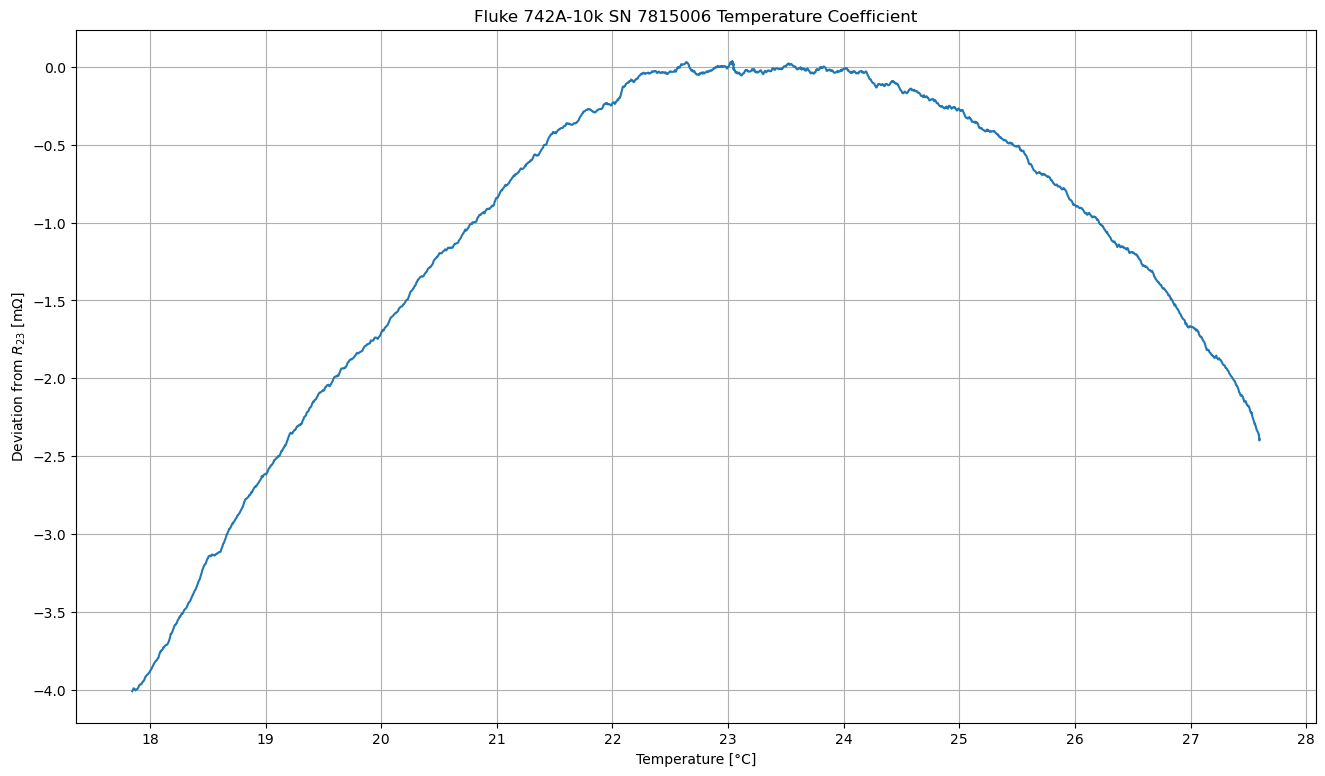

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('https://raw.githubusercontent.com/marcoreps/resistors/refs/heads/main/csv/742a_10k_TCR_sweep_18_23.csv', names=['time', 'DUT_temperature', 'resistance'], skiprows=1)

df=df.interpolate()


temperature=df[1990:-700].DUT_temperature

resistance=df.resistance.rolling(window=20).mean()
resistance=(resistance[1990:-700]-10000.15965)*1000

fig,ax = plt.subplots(figsize=(16,9))
plt.xlabel('Temperature [¬∞C]')
plt.ylabel(r'Deviation from $R_{23}$ [mŒ©]')
ax.set_xticks(np.arange(18, 28.1, 1))
plt.grid(True, which="both")
plt.title('Fluke 742A-10k SN 7815006 Temperature Coefficient')
plt.plot(temperature, resistance)

Measured Œ±(23) = 0.011934936253958108 ppm/¬∞C
Label Œ±(23) = 0 ppm/¬∞C
Measured Œ≤ = -0.013285767586548614 ppm/¬∞C¬≤
Label Œ≤ = -0.032 ppm/¬∞C¬≤
ê§ÉNominal at 23¬∞C = +15.963 ppm perhaps
Temperature at Œ±0 = 23.449162465631332
Test current 500uA


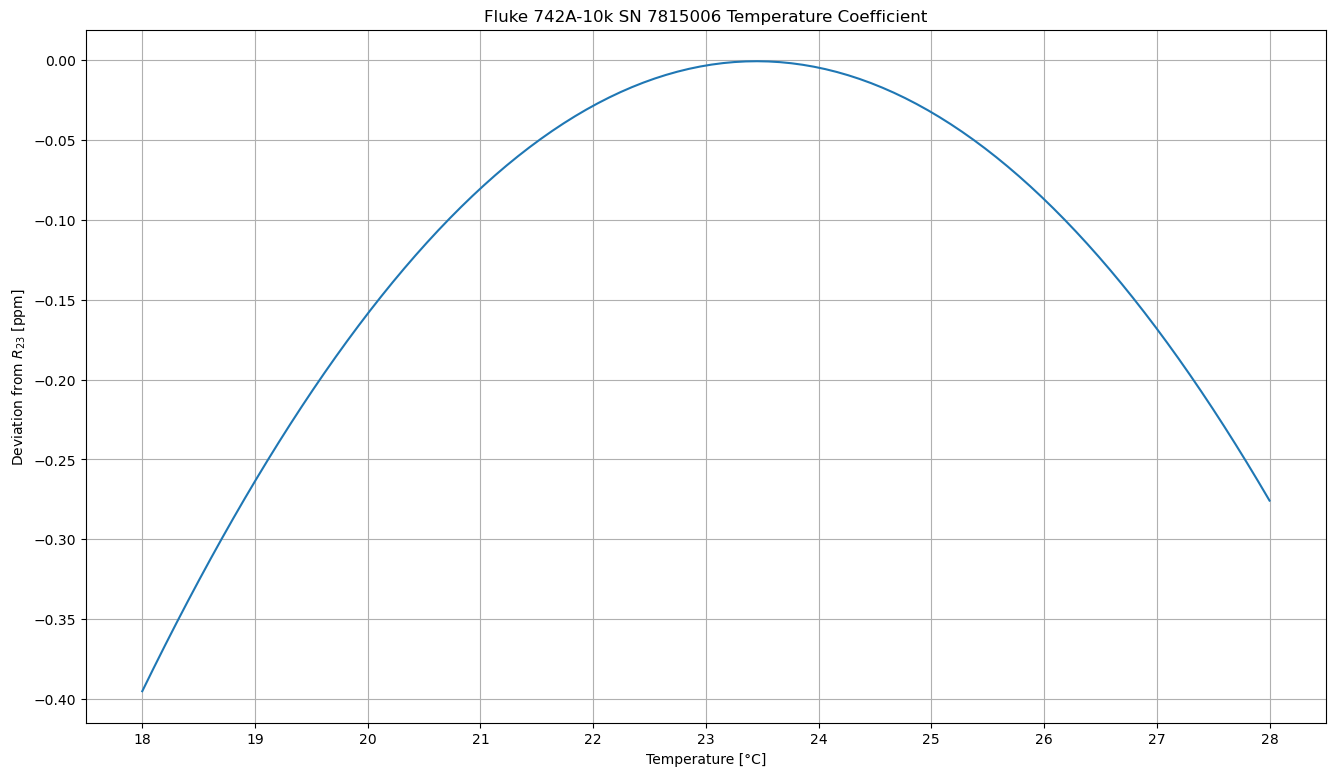

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Chebyshev
from numpy.polynomial.chebyshev import chebfit

df=pd.read_csv('https://raw.githubusercontent.com/marcoreps/resistors/refs/heads/main/csv/742a_10k_TCR_sweep_18_23.csv', names=['time', 'DUT_temperature', 'resistance'], skiprows=1)

df=df.interpolate()


temperature=df[1990:-700].DUT_temperature

resistance=df.resistance.rolling(window=20).mean()
resistance=(resistance[1990:-700]-10000.15967)*100

fig,ax = plt.subplots(figsize=(16,9))
plt.xlabel('Temperature [¬∞C]')
plt.ylabel(r'Deviation from $R_{23}$ [ppm]')
ax.set_xticks(np.arange(18, 28.1, 1))
plt.grid(True, which="both")
plt.title('Fluke 742A-10k SN 7815006 Temperature Coefficient')
#plt.plot(temperature, resistance)

polyfunction = Chebyshev.fit(temperature, resistance, deg=2)
xpoints = np.linspace(18, 28, 100)
plt.plot(xp, polyfunction(xpoints))
derivative=polyfunction.deriv()
print("Measured Œ±(23) = "+str(derivative(23))+" ppm/¬∞C")
print("Label Œ±(23) = 0 ppm/¬∞C")
#plt.plot(xpoints, xpoints*derivative(23)-0.274)
print("Measured Œ≤ = "+str((((polyfunction(28)+polyfunction(18))/2)-polyfunction(23))/25)+" ppm/¬∞C¬≤")
print("Label Œ≤ = -0.032 ppm/¬∞C¬≤")
print("ê§ÉNominal at 23¬∞C = +15.963 ppm perhaps")
print("Temperature at Œ±0 = "+str(np.real(polyfunction.roots()[0])))
print("Test current 500uA")
